In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

<p>Estandarizar las variables numéricas de vuestro set de datos</p>

In [5]:
df = pd.read_pickle('datos/airline_limpieza.pkl')
df.head(3)

,satisfaccion,genero,tipo_de_cliente,clase,comfort_asiento,puntualidad,comida_y_bebida,ubicación_puerta_embarque,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos
0,satisfied,Female,Loyal Customer,Eco,Nada satisfecho,Nada satisfecho,Nada satisfecho,Poco Satisfecho,Satisfecho,Poco Satisfecho,Neutral,Neutral,Neutral,Muy satisfecho,Neutral,Poco Satisfecho,0
1,satisfied,Male,Loyal Customer,Business,Nada satisfecho,Nada satisfecho,Nada satisfecho,Neutral,Poco Satisfecho,Poco Satisfecho,Neutral,Satisfecho,Satisfecho,Poco Satisfecho,Neutral,Poco Satisfecho,310
2,satisfied,Female,Loyal Customer,Eco,Nada satisfecho,Nada satisfecho,Nada satisfecho,Neutral,Nada satisfecho,Poco Satisfecho,Poco Satisfecho,Neutral,Satisfecho,Satisfecho,Satisfecho,Poco Satisfecho,0


In [6]:
df.shape

(129880, 17)

<p>Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.</p>

In [7]:
from sklearn.preprocessing import RobustScaler

In [8]:
numericas = df.select_dtypes(np.number)

In [9]:
robust = RobustScaler()

In [10]:
X_robust = robust.fit_transform(numericas)

In [11]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,retraso_salida_minutos
0,0.000000
1,25.833333


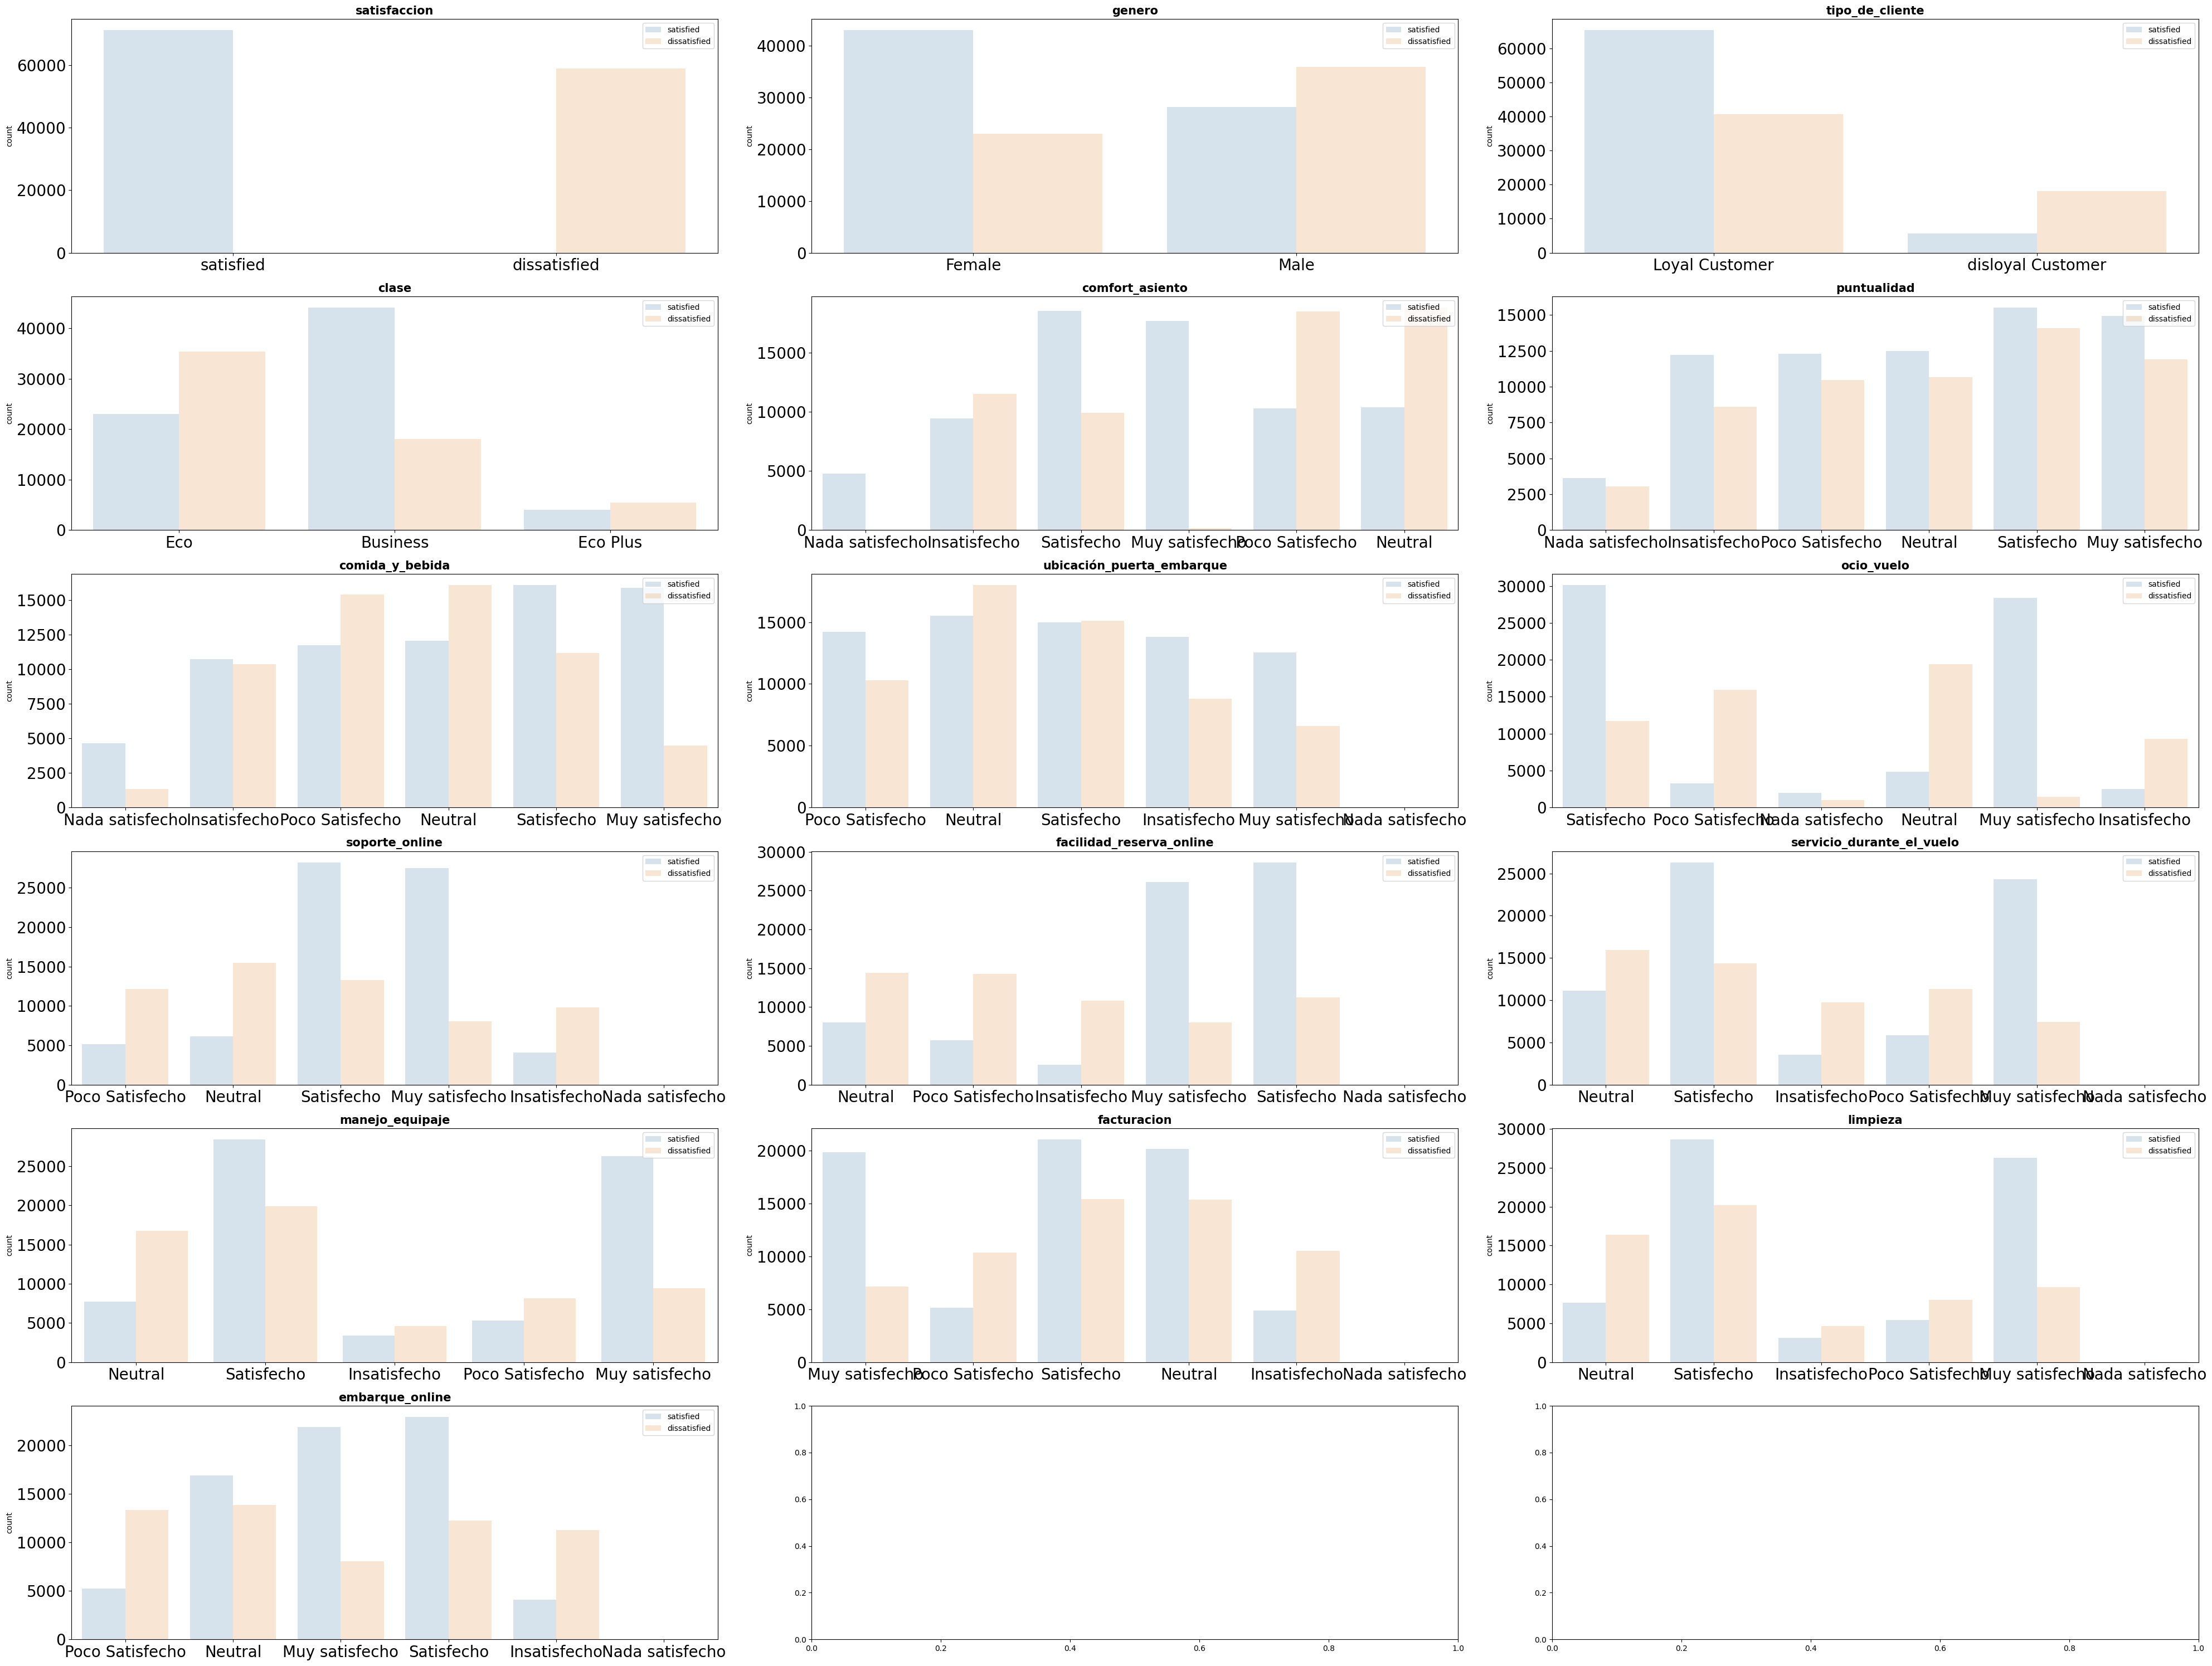

In [13]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (40,30))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaccion",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

<p>Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.</p>

<p>Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.</p>